# Exploratory Data Analysis: CPI & PPI Forecast Inflation

## Introduction

In this notebook, we will explore inflation patterns in the Historical Consumer Price Index (CPI) and Historical Producer Price Index (PPI) forecast series.

Both datasets contain annual percent-change forecasts from 1974–2024 for multiple food-related categories.

Specifically, we will examine:

* Inflation trends over time via line plots

* Cross-category comparisons using bar charts

* The top 5 fastest-inflating categories

* The most volatile categories, measured by standard deviation

These results will later be summarized in the main narrative notebook.

## Imports and Load Data

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["axes.grid"] = True

# Load processed data
cpi = pd.read_csv("../data/processed/processed_cpi.csv")
ppi = pd.read_csv("../data/processed/processed_ppi.csv")

display(cpi.head())
display(ppi.head())

,Year,All_food,Beef_and_veal,Cereals_and_bakery_products,Dairy_products,Eggs,Fats_and_oils,Fish_and_seafood,Food_at_home,Food_away_from_home,...,Fruits_and_vegetables,Meats,Meats_poultry_and_fish,Nonalcoholic_beverages,Other_foods,Other_meats,Pork,Poultry,Processed_fruits_and_vegetables,Sugar_and_sweets
0,1974,14.3,2.9,29.9,18.6,0.4,41.9,15.3,14.9,12.7,...,16.5,1.8,2.2,19.3,21.4,3.1,-0.5,-5.1,NaN,52.4
1,1975,8.5,1.0,11.3,3.1,-1.8,10.7,8.5,8.2,9.4,...,3.1,8.5,8.5,15.0,12.8,5.9,22.4,10.5,NaN,26.1
2,1976,3.0,-3.2,-2.2,8.1,9.2,-12.5,11.7,2.1,6.8,...,2.6,0.2,0.9,19.6,4.1,5.9,1.3,-4.1,NaN,-11.3
3,1977,6.3,-0.7,1.6,2.7,-3.2,10.1,10.8,5.9,7.6,...,9.2,-2.3,-0.6,50.6,3.4,-0.6,-5.4,0.7,NaN,5.0
4,1978,9.9,22.9,9.0,6.8,-5.4,9.6,9.4,10.5,9.1,...,11.1,18.6,16.7,5.8,8.0,17.7,12.9,10.4,NaN,12.3


,Year,Farm_level_cattle,Farm_level_eggs,Farm_level_fruit,Farm_level_milk,Farm_level_soybeans,Farm_level_vegetables,Farm_level_wheat,Finished_consumer_foods,Processed_foods_and_feeds,Unprocessed_foodstuffs_and_feedstuffs,Wholesale_beef,Wholesale_dairy,Wholesale_fats_and_oils,Wholesale_pork,Wholesale_poultry,Wholesale_wheat_flour
0,1974,-10.2,-3.0,6.3,19.3,-4.7,17.4,33.3,14.0,18.9,5.2,-3.1,11.6,59.4,1.1,-11.3,29.4
1,1975,-1.7,-0.6,9.5,4.2,-18.4,-8.7,-19.7,8.4,-2.4,1.3,11.1,6.5,-13.1,32.4,17.0,-13.5
2,1976,-7.1,12.1,1.2,11.6,6.0,-7.7,-13.3,-0.3,-5.1,-0.8,-11.4,8.1,-20.9,-6.2,-9.7,-9.5
3,1977,2.3,-9.6,11.1,0.8,18.8,3.7,-22.5,5.3,2.8,0.9,0.9,3.0,16.5,-5.6,4.3,-19.6
4,1978,32.4,-2.1,20.3,8.4,-5.8,7.0,24.3,9.0,6.5,12.6,28.3,8.6,8.5,15.3,12.0,19.1


### Tidy Long Formatting

In [2]:
cpi_long = cpi.melt(id_vars="Year", var_name="category", value_name="pct_change")
cpi_long.head()

,Year,category,pct_change
0,1974,All_food,14.3
1,1975,All_food,8.5
2,1976,All_food,3.0
3,1977,All_food,6.3
4,1978,All_food,9.9


In [3]:
ppi_long = ppi.melt(id_vars="Year", var_name="category", value_name="pct_change")
ppi_long.head()

,Year,category,pct_change
0,1974,Farm_level_cattle,-10.2
1,1975,Farm_level_cattle,-1.7
2,1976,Farm_level_cattle,-7.1
3,1977,Farm_level_cattle,2.3
4,1978,Farm_level_cattle,32.4


## Line plots of inflation over time

Line plots can show how forecast inflation changes year-to-year for each category.

By plotting all categories in each dataset, we will be able to visually inspect:

- Long-run trends in food price forecasts  
- Periods of high inflation (e.g., 1970s, post-2020)  
- How different categories move together or diverge  

We first start with CPI, then repeat for PPI.


### CPI Line Plot:

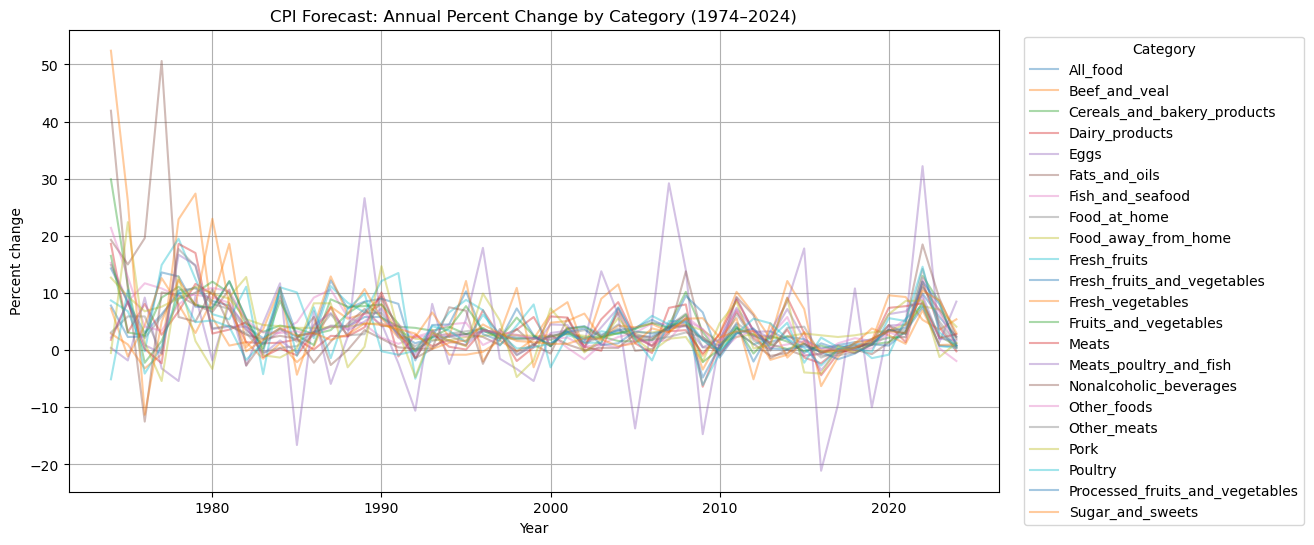

In [4]:
fig, ax = plt.subplots()

for cat, df_cat in cpi_long.groupby("category"):
    ax.plot(
        df_cat["Year"],
        df_cat["pct_change"],
        alpha=0.4,
        label=cat
    )

ax.set_title("CPI Forecast: Annual Percent Change by Category (1974–2024)")
ax.set_xlabel("Year")
ax.set_ylabel("Percent change")

ax.legend(
    title="Category",
    bbox_to_anchor=(1.02, 1),
    loc="upper left"
)
plt.show()

### PPI Line Plot:

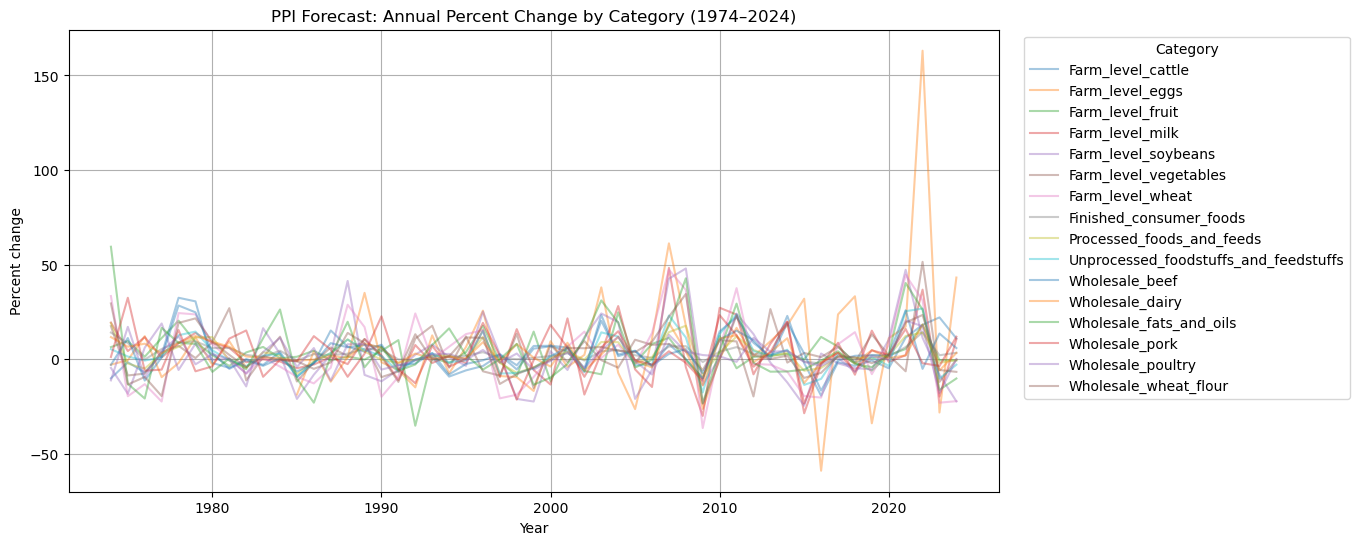

In [5]:
fig, ax = plt.subplots()

for cat, df_cat in ppi_long.groupby("category"):
    ax.plot(
        df_cat["Year"],
        df_cat["pct_change"],
        alpha=0.4,
        label=cat
    )

ax.set_title("PPI Forecast: Annual Percent Change by Category (1974–2024)")
ax.set_xlabel("Year")
ax.set_ylabel("Percent change")

ax.legend(
    title="Category",
    bbox_to_anchor=(1.02, 1),
    loc="upper left"
)
plt.show()

## Bar charts comparing categories

To compare categories more directly, we will now collapse the time dimension and compute the average annual percent change for each category.

This will give us a single summary number for each category, which we visualize with bar charts. Higher means indicate categories that, on average, are forecasted to inflate more quickly.


### 1. Compute mean inflation per category

In [6]:
cpi_mean = (
    cpi_long
    .groupby("category")["pct_change"]
    .mean()
    .sort_values(ascending=False)
)

display(cpi_mean)

ppi_mean = (
    ppi_long
    .groupby("category")["pct_change"]
    .mean()
    .sort_values(ascending=False)
)

display(ppi_mean)

category
Sugar_and_sweets                   4.588235
Fresh_fruits                       4.576471
Cereals_and_bakery_products        4.321569
Food_away_from_home                4.278431
Fresh_fruits_and_vegetables        4.268627
Fish_and_seafood                   4.250980
Nonalcoholic_beverages             4.239216
Beef_and_veal                      4.078431
Fruits_and_vegetables              4.076471
Fresh_vegetables                   4.072549
Fats_and_oils                      4.060784
All_food                           3.882353
Other_foods                        3.864706
Food_at_home                       3.682353
Meats                              3.519608
Meats_poultry_and_fish             3.458824
Dairy_products                     3.390196
Other_meats                        3.270588
Eggs                               3.225490
Pork                               3.009804
Poultry                            2.849020
Processed_fruits_and_vegetables    2.723077
Name: pct_change, dtype

category
Farm_level_eggs                          6.534694
Wholesale_fats_and_oils                  4.131373
Farm_level_milk                          3.476471
Farm_level_vegetables                    3.450980
Wholesale_beef                           3.409804
Farm_level_cattle                        3.247059
Finished_consumer_foods                  3.207843
Wholesale_dairy                          3.200000
Wholesale_wheat_flour                    2.996078
Farm_level_wheat                         2.978431
Processed_foods_and_feeds                2.672549
Wholesale_pork                           2.654902
Unprocessed_foodstuffs_and_feedstuffs    2.623529
Farm_level_fruit                         2.621569
Farm_level_soybeans                      2.317647
Wholesale_poultry                        1.429412
Name: pct_change, dtype: float64

### 2. Bar charts of all categories

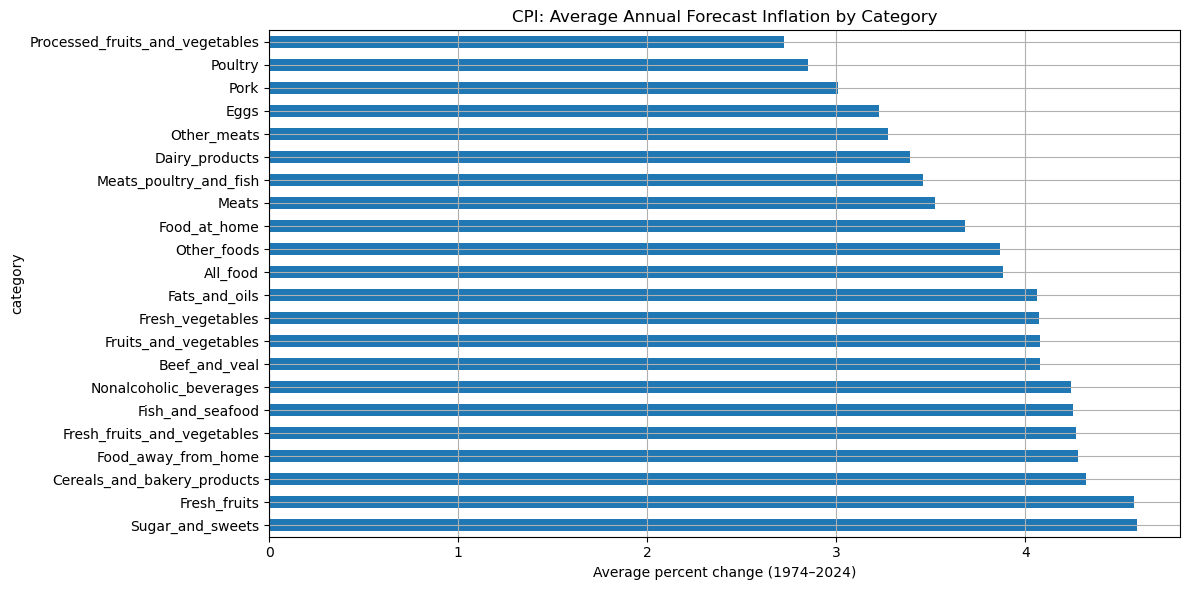

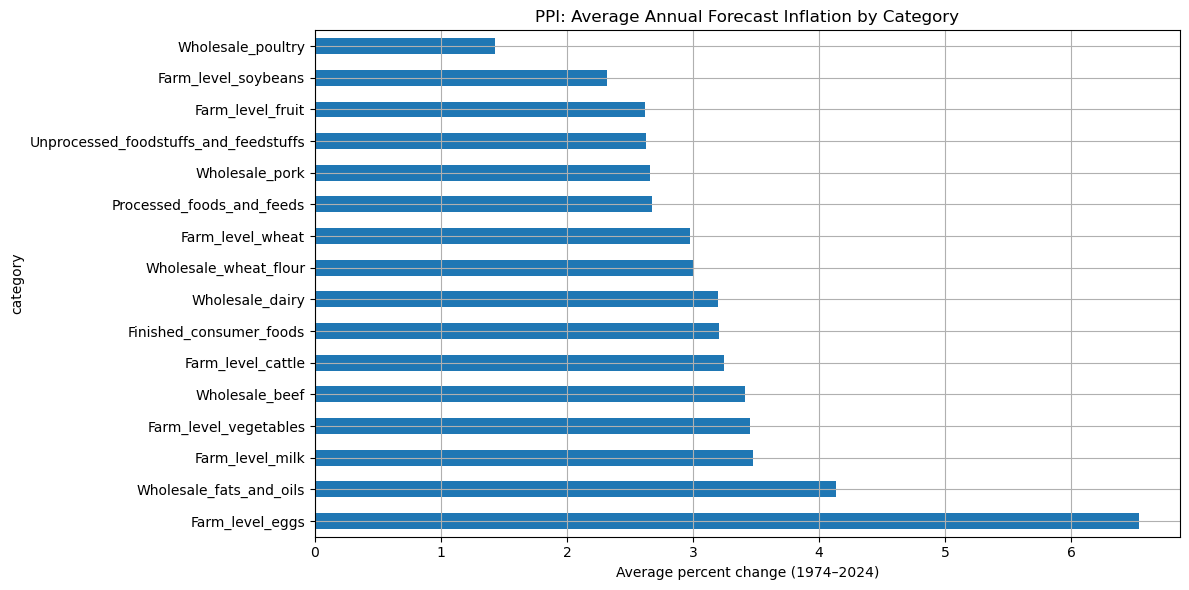

In [7]:
# CPI:
cpi_mean.plot(kind="barh")
plt.title("CPI: Average Annual Forecast Inflation by Category")
plt.xlabel("Average percent change (1974–2024)")
plt.tight_layout()
plt.show()

# PPI:
ppi_mean.plot(kind="barh")
plt.title("PPI: Average Annual Forecast Inflation by Category")
plt.xlabel("Average percent change (1974–2024)")
plt.tight_layout()
plt.show()

## Top 5 fastest-inflating categories

Next, we explicitly rank categories by their average annual forecast inflation and highlight the top 5 for each dataset.

These categories represent the food items with the most persistent upward
price pressure in the forecast data.


### Extract top 5

In [8]:
cpi_top5 = cpi_mean.head(5)
ppi_top5 = ppi_mean.head(5)

display(cpi_top5)
display(ppi_top5)

category
Sugar_and_sweets               4.588235
Fresh_fruits                   4.576471
Cereals_and_bakery_products    4.321569
Food_away_from_home            4.278431
Fresh_fruits_and_vegetables    4.268627
Name: pct_change, dtype: float64

category
Farm_level_eggs            6.534694
Wholesale_fats_and_oils    4.131373
Farm_level_milk            3.476471
Farm_level_vegetables      3.450980
Wholesale_beef             3.409804
Name: pct_change, dtype: float64

### Plot top 5 (CPI & PPI)

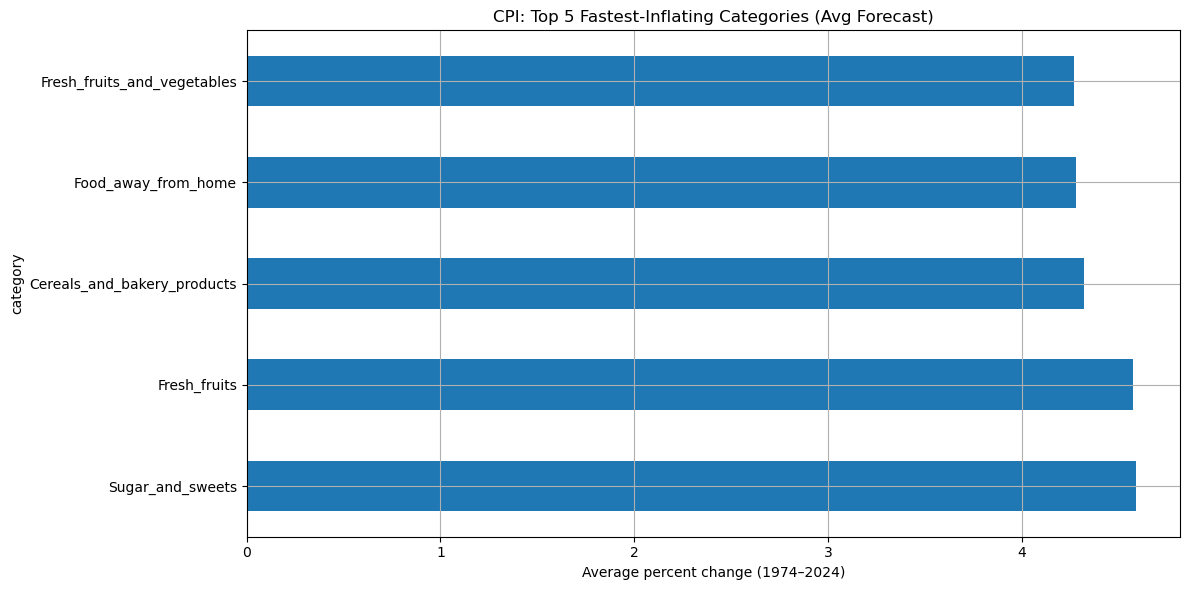

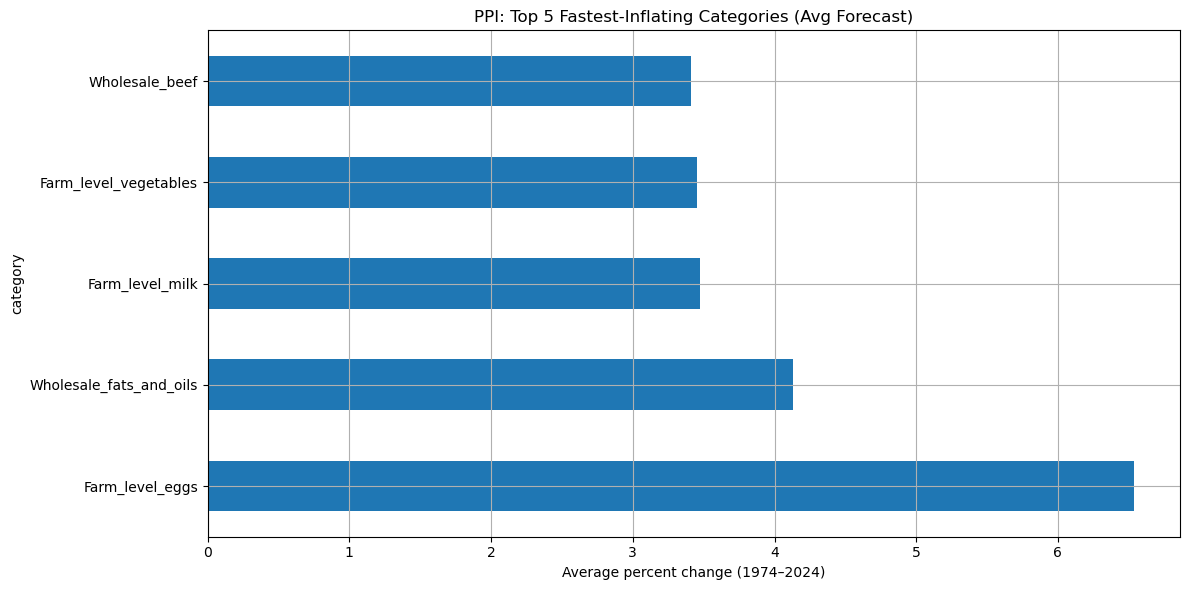

In [9]:
# CPI: 
cpi_top5.plot(kind="barh")
plt.title("CPI: Top 5 Fastest-Inflating Categories (Avg Forecast)")
plt.xlabel("Average percent change (1974–2024)")
plt.tight_layout()
plt.show()

# PPI:
ppi_top5.plot(kind="barh")
plt.title("PPI: Top 5 Fastest-Inflating Categories (Avg Forecast)")
plt.xlabel("Average percent change (1974–2024)")
plt.tight_layout()
plt.show()

## Most volatile categories (year-to-year)

To measure how unstable inflation forecasts are, we will look at the standard deviation of the annual percent change for each category:

A higher standard deviation means the category's inflation forecast fluctuates more from year to year (higher volatility).


### Compute volatility per category

In [10]:
cpi_vol = (
    cpi_long
    .groupby("category")["pct_change"]
    .std()
    .sort_values(ascending=False)
)

ppi_vol = (
    ppi_long
    .groupby("category")["pct_change"]
    .std()
    .sort_values(ascending=False)
)

display(cpi_vol)
display(ppi_vol)

category
Eggs                               10.696875
Sugar_and_sweets                    8.731842
Nonalcoholic_beverages              8.114507
Fats_and_oils                       7.371705
Beef_and_veal                       5.891666
Pork                                5.629574
Fresh_fruits                        5.314719
Cereals_and_bakery_products         5.037909
Fresh_vegetables                    4.717079
Meats                               4.407041
Dairy_products                      4.298477
Fresh_fruits_and_vegetables         4.078014
Other_foods                         4.033501
Poultry                             4.014343
Other_meats                         3.773502
Fish_and_seafood                    3.756827
Fruits_and_vegetables               3.730769
Meats_poultry_and_fish              3.722804
Processed_fruits_and_vegetables     3.258995
Food_at_home                        3.232504
All_food                            2.886500
Food_away_from_home                 2.644263
N

category
Farm_level_eggs                          31.169660
Farm_level_wheat                         19.420044
Farm_level_soybeans                      17.729610
Wholesale_fats_and_oils                  16.889482
Farm_level_milk                          15.097080
Farm_level_vegetables                    12.094914
Wholesale_wheat_flour                    12.071768
Wholesale_pork                           11.294287
Farm_level_cattle                        10.915628
Unprocessed_foodstuffs_and_feedstuffs     9.721823
Farm_level_fruit                          9.421535
Wholesale_beef                            9.167383
Wholesale_poultry                         7.644143
Wholesale_dairy                           6.664203
Processed_foods_and_feeds                 6.581309
Finished_consumer_foods                   3.545580
Name: pct_change, dtype: float64

### Plot most volatile categories (top 5)

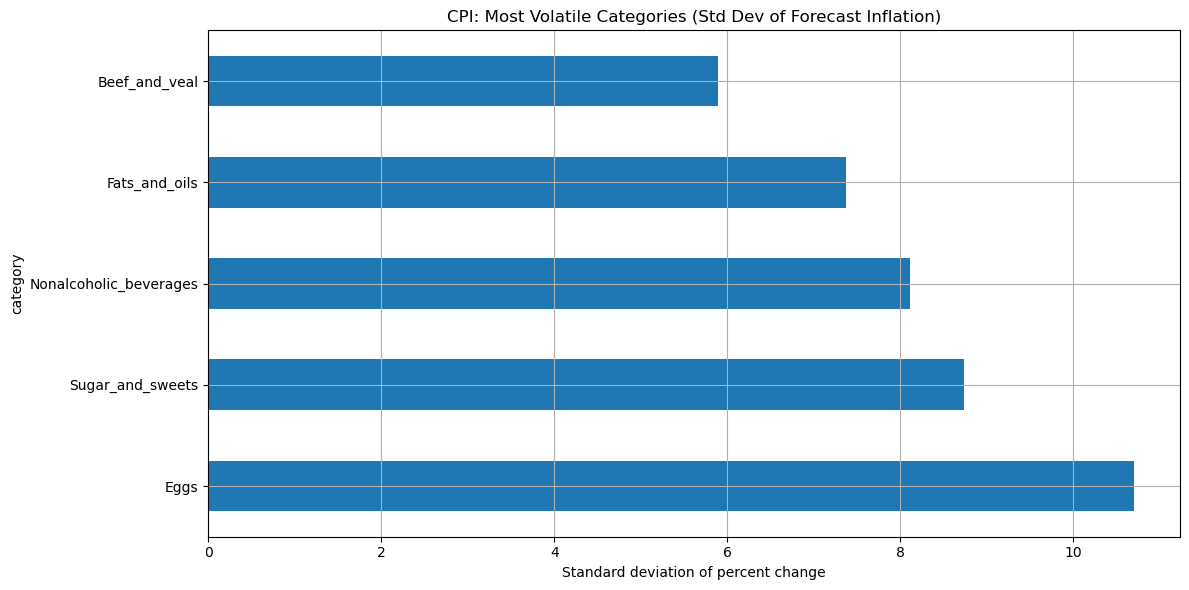

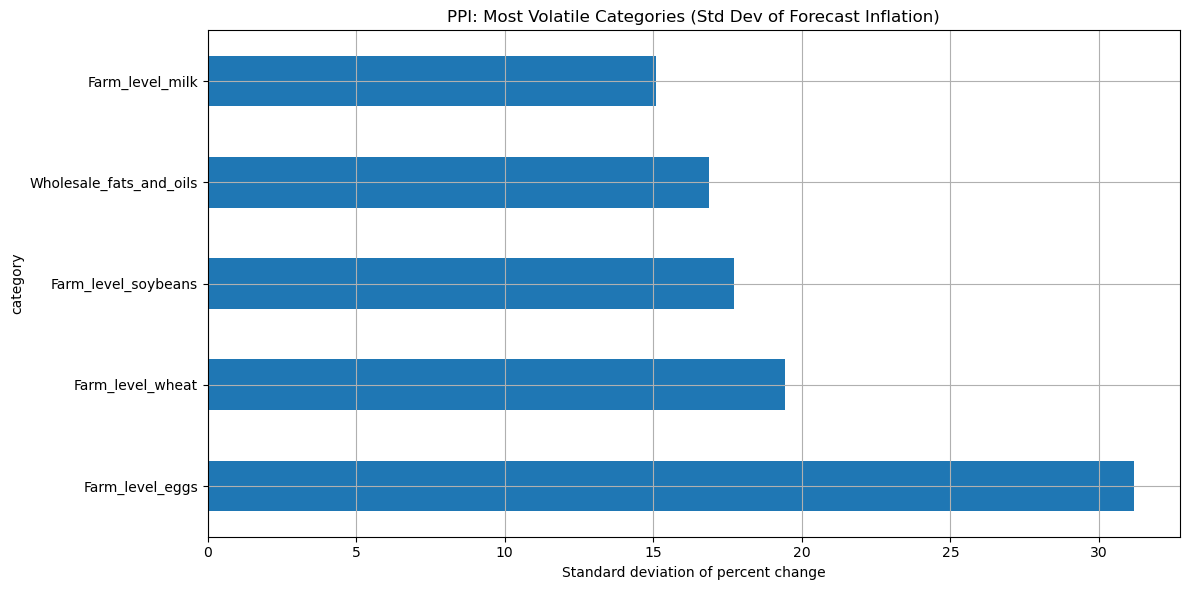

In [11]:
# CPI: 
cpi_vol.head(5).plot(kind="barh")
plt.title("CPI: Most Volatile Categories (Std Dev of Forecast Inflation)")
plt.xlabel("Standard deviation of percent change")
plt.tight_layout()
plt.show()

# PPI: 
ppi_vol.head(5).plot(kind="barh")
plt.title("PPI: Most Volatile Categories (Std Dev of Forecast Inflation)")
plt.xlabel("Standard deviation of percent change")
plt.tight_layout()
plt.show()

# Saving Summary Tables for Later Use

In [12]:
# make a directory called eda_summary under ../data/processed/
save_directory = "../data/processed/eda_summary/"
os.makedirs(save_directory, exist_ok=True)

cpi_mean.to_csv(save_directory + "cpi_mean_inflation.csv")
cpi_vol.to_csv(save_directory + "cpi_volatility.csv")
ppi_mean.to_csv(save_directory + "ppi_mean_inflation.csv")
ppi_vol.to_csv(save_directory + "ppi_volatility.csv")